In [10]:
#!pip install pandas
#!pip install tensorflow
#!pip install pillow
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.5 kB 1.3 MB/s eta 0:00:01
     ----------------------- -------------- 102.4/165.5 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 4.1 MB/s eta 0:00:02
   ---------------------------------------- 0.1/8.0 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.2/8.0 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.0 MB 2.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/8.0 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/8.0 MB 2.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.0 MB 2.5 MB/s eta 0:00:03
   ----- -

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



In [13]:

x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

input_shape = (28,28,1)


In [37]:
def lenet5(input_shape):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), activation="relu", input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2,2), activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))



    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=(2,2), activation="relu", padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, strides=(1,1), activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(units=10,activation="softmax"))


    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

    return model

In [38]:
"""def alexnet(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), stride=(1,1), activation="relu", input_shape=input_shape))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), stride=(1,1), activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=(2,2), stride=(1,1), activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=(2,2), stride=(1,1), activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=(2,2), stride=(1,1), activation="relu"))

    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense())
    model.add(tf.keras.layers.Dense())

    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
    return model"""

'def alexnet(input_shape):\n    model = tf.keras.Sequential()\n    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), stride=(1,1), activation="relu", input_shape=input_shape))\n    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))\n\n    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), stride=(1,1), activation="relu"))\n    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))\n\n    model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=(2,2), stride=(1,1), activation="relu"))\n    model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=(2,2), stride=(1,1), activation="relu"))\n    model.add(tf.keras.layers.Conv2D(filters=12, kernel_size=(2,2), stride=(1,1), activation="relu"))\n\n    model.add(tf.keras.layers.MaxPool2D())\n    model.add(tf.keras.layers.Dropout(0.5))\n\n    model.add(tf.keras.layers.Dense())\n    model.add(tf.keras.layers.Dropout(0.5))\n\n    model.add(tf.keras.layers.Dense())\n    model.add(tf.keras.lay

In [39]:
lenet_5 = lenet5(input_shape)


In [41]:
history = lenet_5.fit(x_train, y_train, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9823 - loss: 0.0566
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9863 - loss: 0.0443
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9895 - loss: 0.0342
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9899 - loss: 0.0327
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9908 - loss: 0.0295
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9917 - loss: 0.0277
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9927 - loss: 0.0244
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9927 - loss: 0.0234
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.9927 - loss: 0.0224
Epoch 10/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9941 - loss: 0.0183
Epoch 11/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 55ms/step - accuracy: 0.9940 - loss: 0.0183
Epoch 12/15
938/938 ━━━━━━━━━━

In [42]:
history.history

{'accuracy': [0.9840166568756104,
  0.9870833158493042,
  0.9890000224113464,
  0.989883303642273,
  0.9906499981880188,
  0.9915333390235901,
  0.9924833178520203,
  0.9926833510398865,
  0.9930833578109741,
  0.9936833381652832,
  0.9940500259399414,
  0.9939833283424377,
  0.9939000010490417,
  0.994700014591217,
  0.9951000213623047],
 'loss': [0.05166753754019737,
  0.04265771433711052,
  0.03585334122180939,
  0.03322320058941841,
  0.03037051111459732,
  0.026874544098973274,
  0.02522975020110607,
  0.024194752797484398,
  0.021694889292120934,
  0.019577929750084877,
  0.018665459007024765,
  0.018849074840545654,
  0.018904604017734528,
  0.01582307554781437,
  0.01582973450422287]}

In [43]:
result = lenet_5.evaluate(x_test, y_test, batch_size=128)
result

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9943 - loss: 0.0199


[0.01655437983572483, 0.9952999949455261]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
7


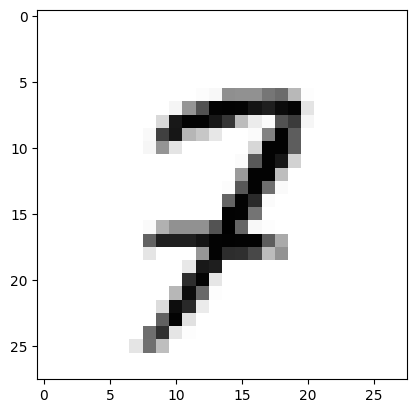

In [44]:
# Plot the Image
image_index = 2507
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

# Make Prediction
pred = lenet_5.predict(x_test[image_index].reshape(1, 28, 28, 1 ))
print(pred.argmax())

In [46]:
lenet_5.save("lenet_5_v2.keras")